In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting_utils import binToDf, extract_data, scatter_plot
sns.set_theme(font_scale=2)
import pyarma as pa

In [4]:
data40   = extract_data([f'../output/40_far/L=40_{i}.bin' for i in range(0, 32)])
data60 = extract_data([f'../output/60_far/L=60_{i}.bin' for i in range(0, 32)])
data80 = extract_data([f'../output/80_far/L=80_{i}.bin' for i in range(0, 32)])
data100 = extract_data([f'../output/100_far/L=100_{i}.bin' for i in range(0, 32)])
data120 = extract_data([f'../output/120_far/L=120_{i}.bin' for i in range(0, 32)])
data140 = extract_data([f'../output/140_far/L=140_{i}.bin' for i in range(0, 32)])

data = [data40, data60, data80, data100, data120, data140]

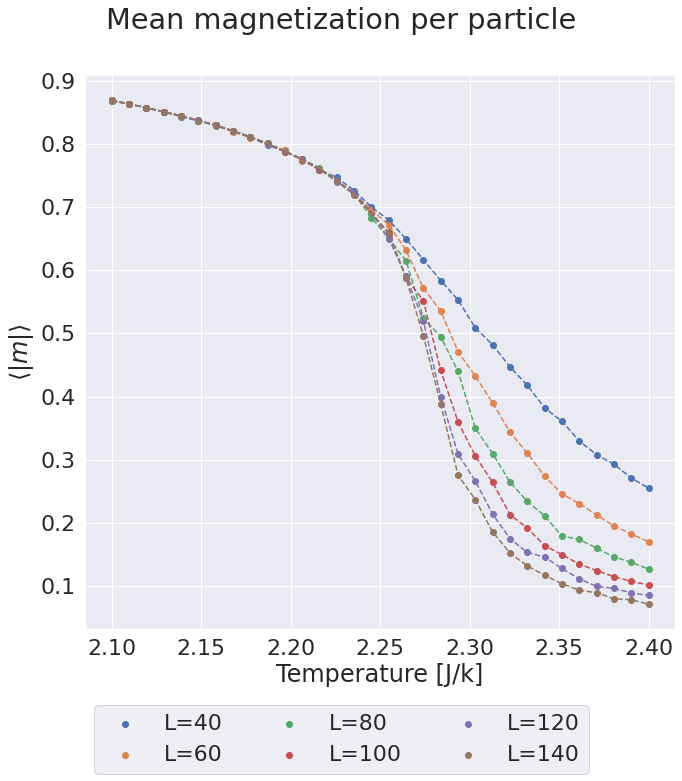

In [6]:
mags = [d['M'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [J/k]'
ylabel = r'$\langle|m|\rangle$'
title = "Mean magnetization per particle"
scatter_plot(temps, mags, xlabel, ylabel, title, labels, savefig=True, filename='phase_mag', height=-0.10)

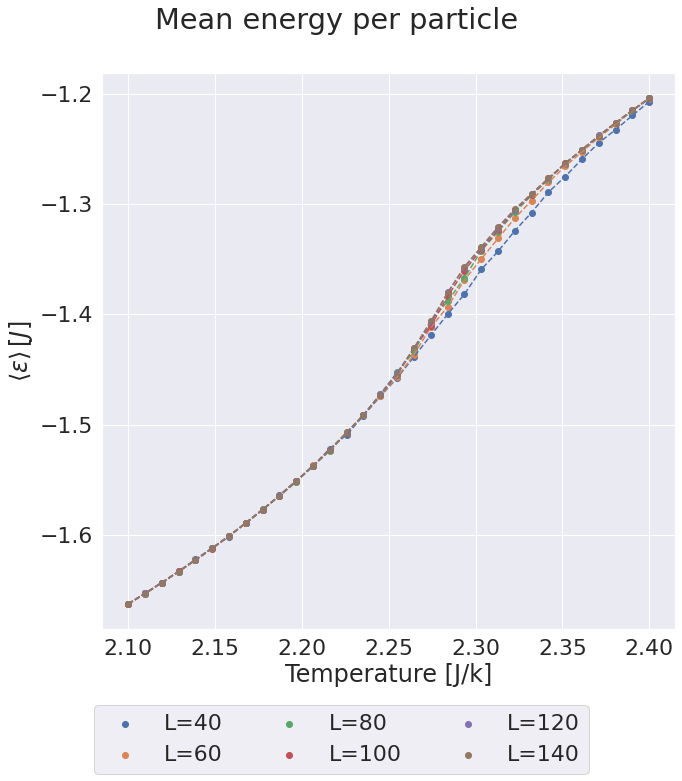

In [7]:
engs = [d['E'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [J/k]'
ylabel = r'$\langle\epsilon\rangle\, [J]$'
title = 'Mean energy per particle '
scatter_plot(temps, engs, xlabel, ylabel, title, labels, savefig=True, filename='phase_eng', height=-0.10)

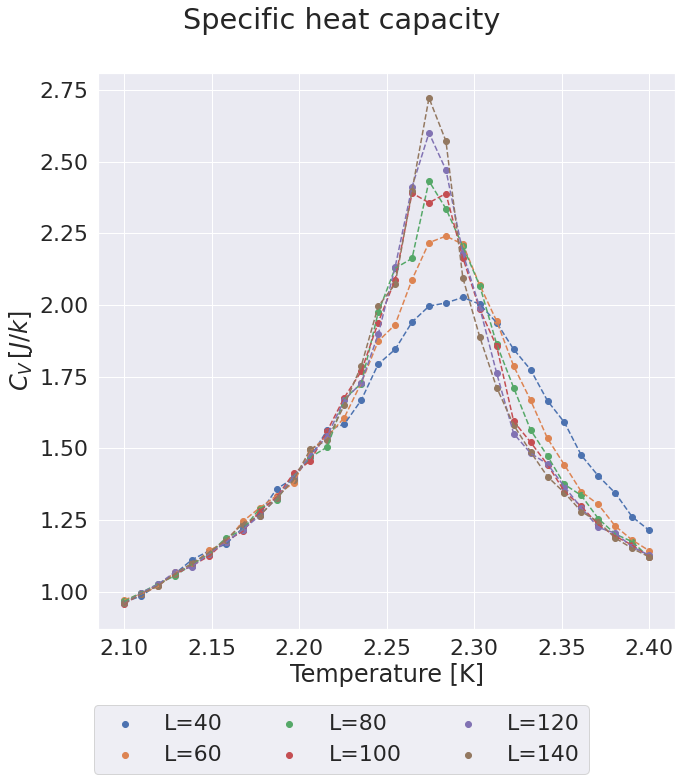

In [8]:
heatcap = [d['C'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [K]'
ylabel = r'$C_V\, [J/k]$'
title = 'Specific heat capacity'
scatter_plot(temps, heatcap, xlabel, ylabel, title, labels, savefig=True, filename='phase_cv', height=-0.10)

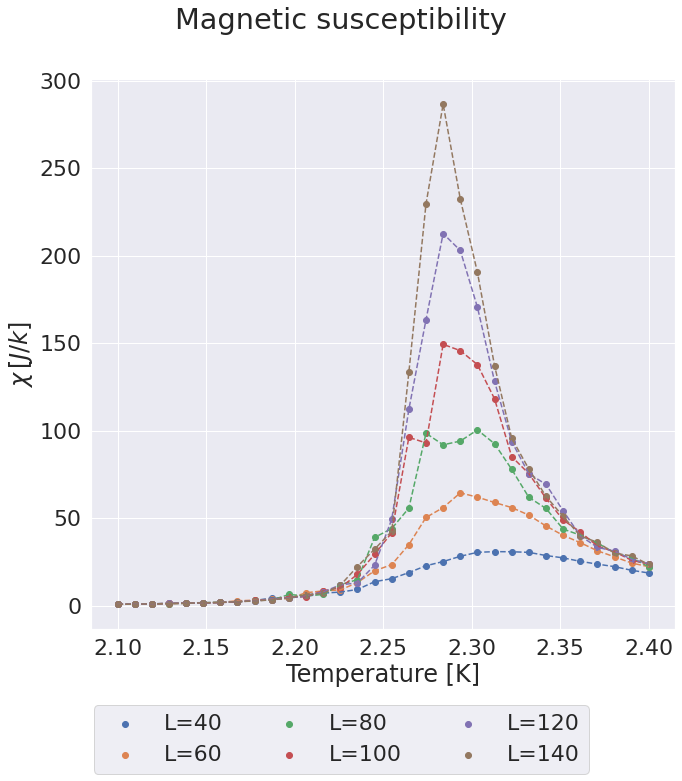

In [9]:
magsusc = [d['X'] for d in data]
temps = [d['T'] for d in data]
labels = [f"L={int(d.L[0])}" for d in data]
xlabel = r'Temperature [K]'
ylabel = r'$\chi\, [J/k]$'
title = r'Magnetic susceptibility'
scatter_plot(temps, magsusc, xlabel, ylabel, title, labels, savefig=True, filename='phase_chi', height=-0.10)

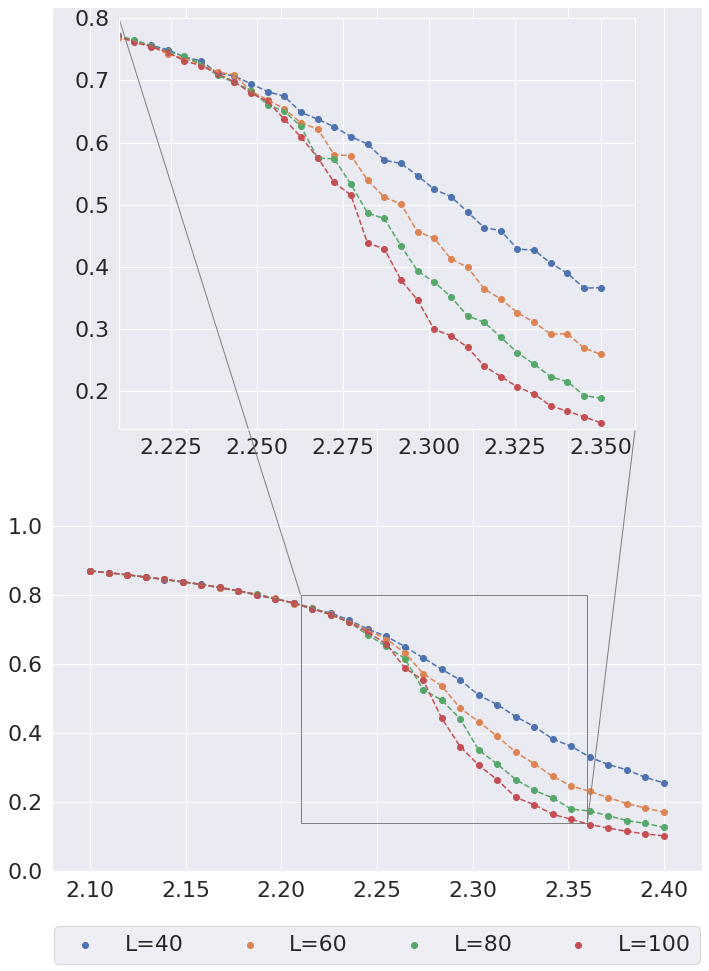

In [40]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

left, bottom = 0.05, 0.1 # for very left and very bottom
thickx, thicky = 0.03, 0.125 # thickness of the left and bottom plots
width, height = 0.75, 0.6 # width and height of main plot
dpx = .025 # space between plots
dpy = .08

# axes for each of the three plots: [left,bottom,width,height]
rect_main = [left+thickx+dpx,bottom+thicky+dpy,width+.153,height] # main plot
rect_left = [left,bottom+thicky+dpy,thickx,height] # left side small plot
rect_bottom = [left+thickx+dpx,bottom,width,thicky] # bottom small plot
nullfmt   = plt.NullFormatter()         # no labels
nullloc   = plt.NullLocator()         

# start with a rectangular figure
plt.figure(1,figsize=(10,20))

axMain = plt.axes(rect_main)

labels = [f"L={int(d.L[0])}" for d in data]
for index, d in enumerate(datafar):
    plt.plot(d['T'], d['M'], linestyle='--')
    plt.scatter(d['T'], d['M'], label=labels[index])

plt.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.12))


axMain.set_xlim(2.08, 2.42)
axMain.set_ylim(0.0, 2.5)
axMain.set_yticks(np.arange(0, 1.2, 0.2))

axins = zoomed_inset_axes(axMain,1.8,loc='upper center') # zoom=6

for index, d in enumerate(data):
    axins.plot(d['T'], d['M'], linestyle='--')
    axins.scatter(d['T'], d['M'], label=labels[index])

# subregion of the original image
x1,x2,y1,y2 = 2.21, 2.36, 0.14, 0.80
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
#plt.setp(axins,xticks=[],yticks=[])
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(axMain, axins, loc1=2, loc2=4, ec="0.5")
plt.savefig('phase_close_comp.pdf')
plt.draw()

